# Processamento Inicial

### Importa bibliotecas

In [1]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Define o diretório de trabalho

In [2]:
#workdir_path = '/mnt/5bdd0b49-a2cd-495d-a27b-f4810abd97ca/home/osias/Projects/'+\
#'Processamento de linguagem natural/Trabalho BI 2019'
#os.chdir(workdir_path)

### Leitura da base de reclamações

In [2]:
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,Nao Informada
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,entre 31 a 40 anos
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa, Cinto, Chapé...",Produto entregue diferente do pedido,entre 21 a 30 anos
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,Nao Informada
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


### Quantidade de linhas e de colunas do dataframe lido

In [3]:
data.shape

(42307, 8)

## Colunas da tabela

In [4]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

### Localização das colunas com valores "null"

In [5]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Tratamento das empresas

### Separação da coluna das empresas

In [6]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

### Verificação se há algum "null"

In [7]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

### Remoção dos "nulls" encontrados

In [8]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

### Substitui:

#### " " por "_" (espaço)

#### "/" por "" 

#### "," por "" 

#### "(" por "" 

#### ")" por "" 

#### "-" por ""

#### "." por ""

#### "\t" por "" (tab)

### para o wordcloud funcionar

In [9]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

### Converte o nome das empresas para letras minúsculas

In [10]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

### Apreciação inicial do que foi obtido

In [11]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))



Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
mas_cobrança_e_reestruturaçao_de_ativos_financeiro       1
mas_informatica_ltda__contato_informática                1
mas_informatica_ltda__me                                 1
masima_incorporações_&_empreedimentos_ltda               1
123_viagem_de_turismo_ltda                               1
Length: 10607, dtype: int64


### Criação de uma string única com todas as ocorrências dos nomes das empresas

In [12]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

### Geração do wordcloud das 40 empresas mais reclamadas

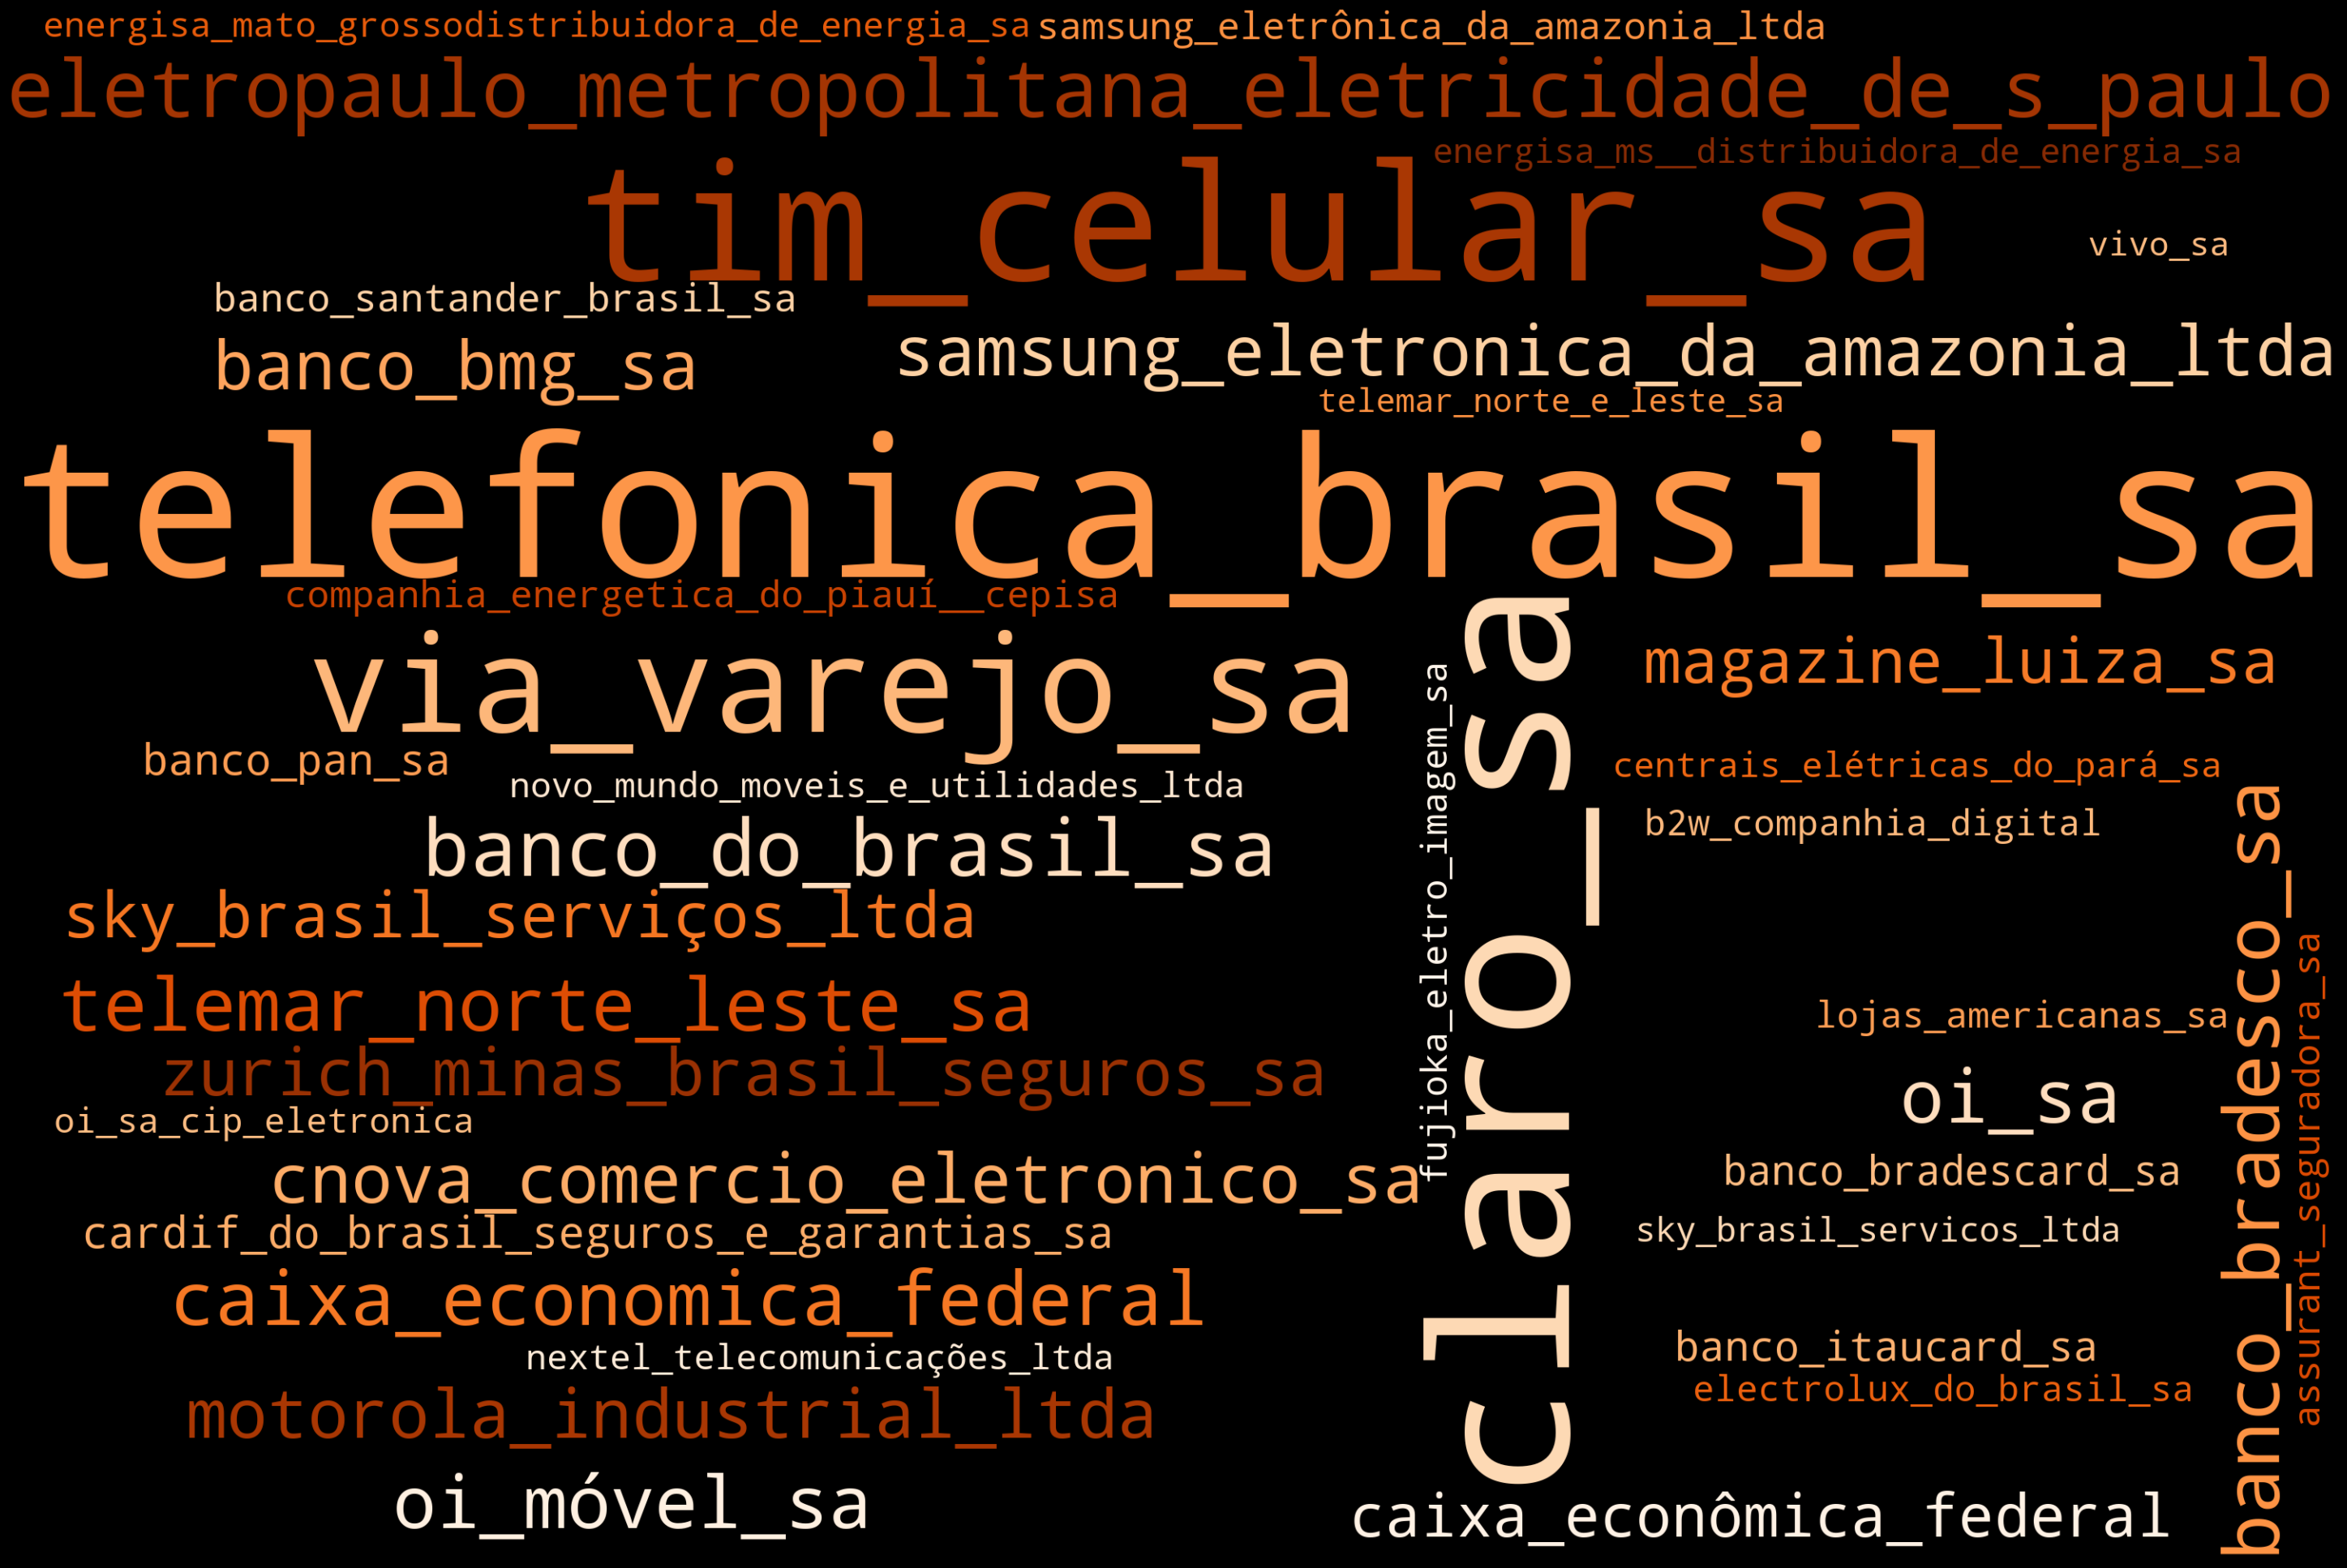

In [13]:
wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

## Colocando efeito do Mapa do Brasil na nuvem de palavras

In [14]:
from PIL import Image

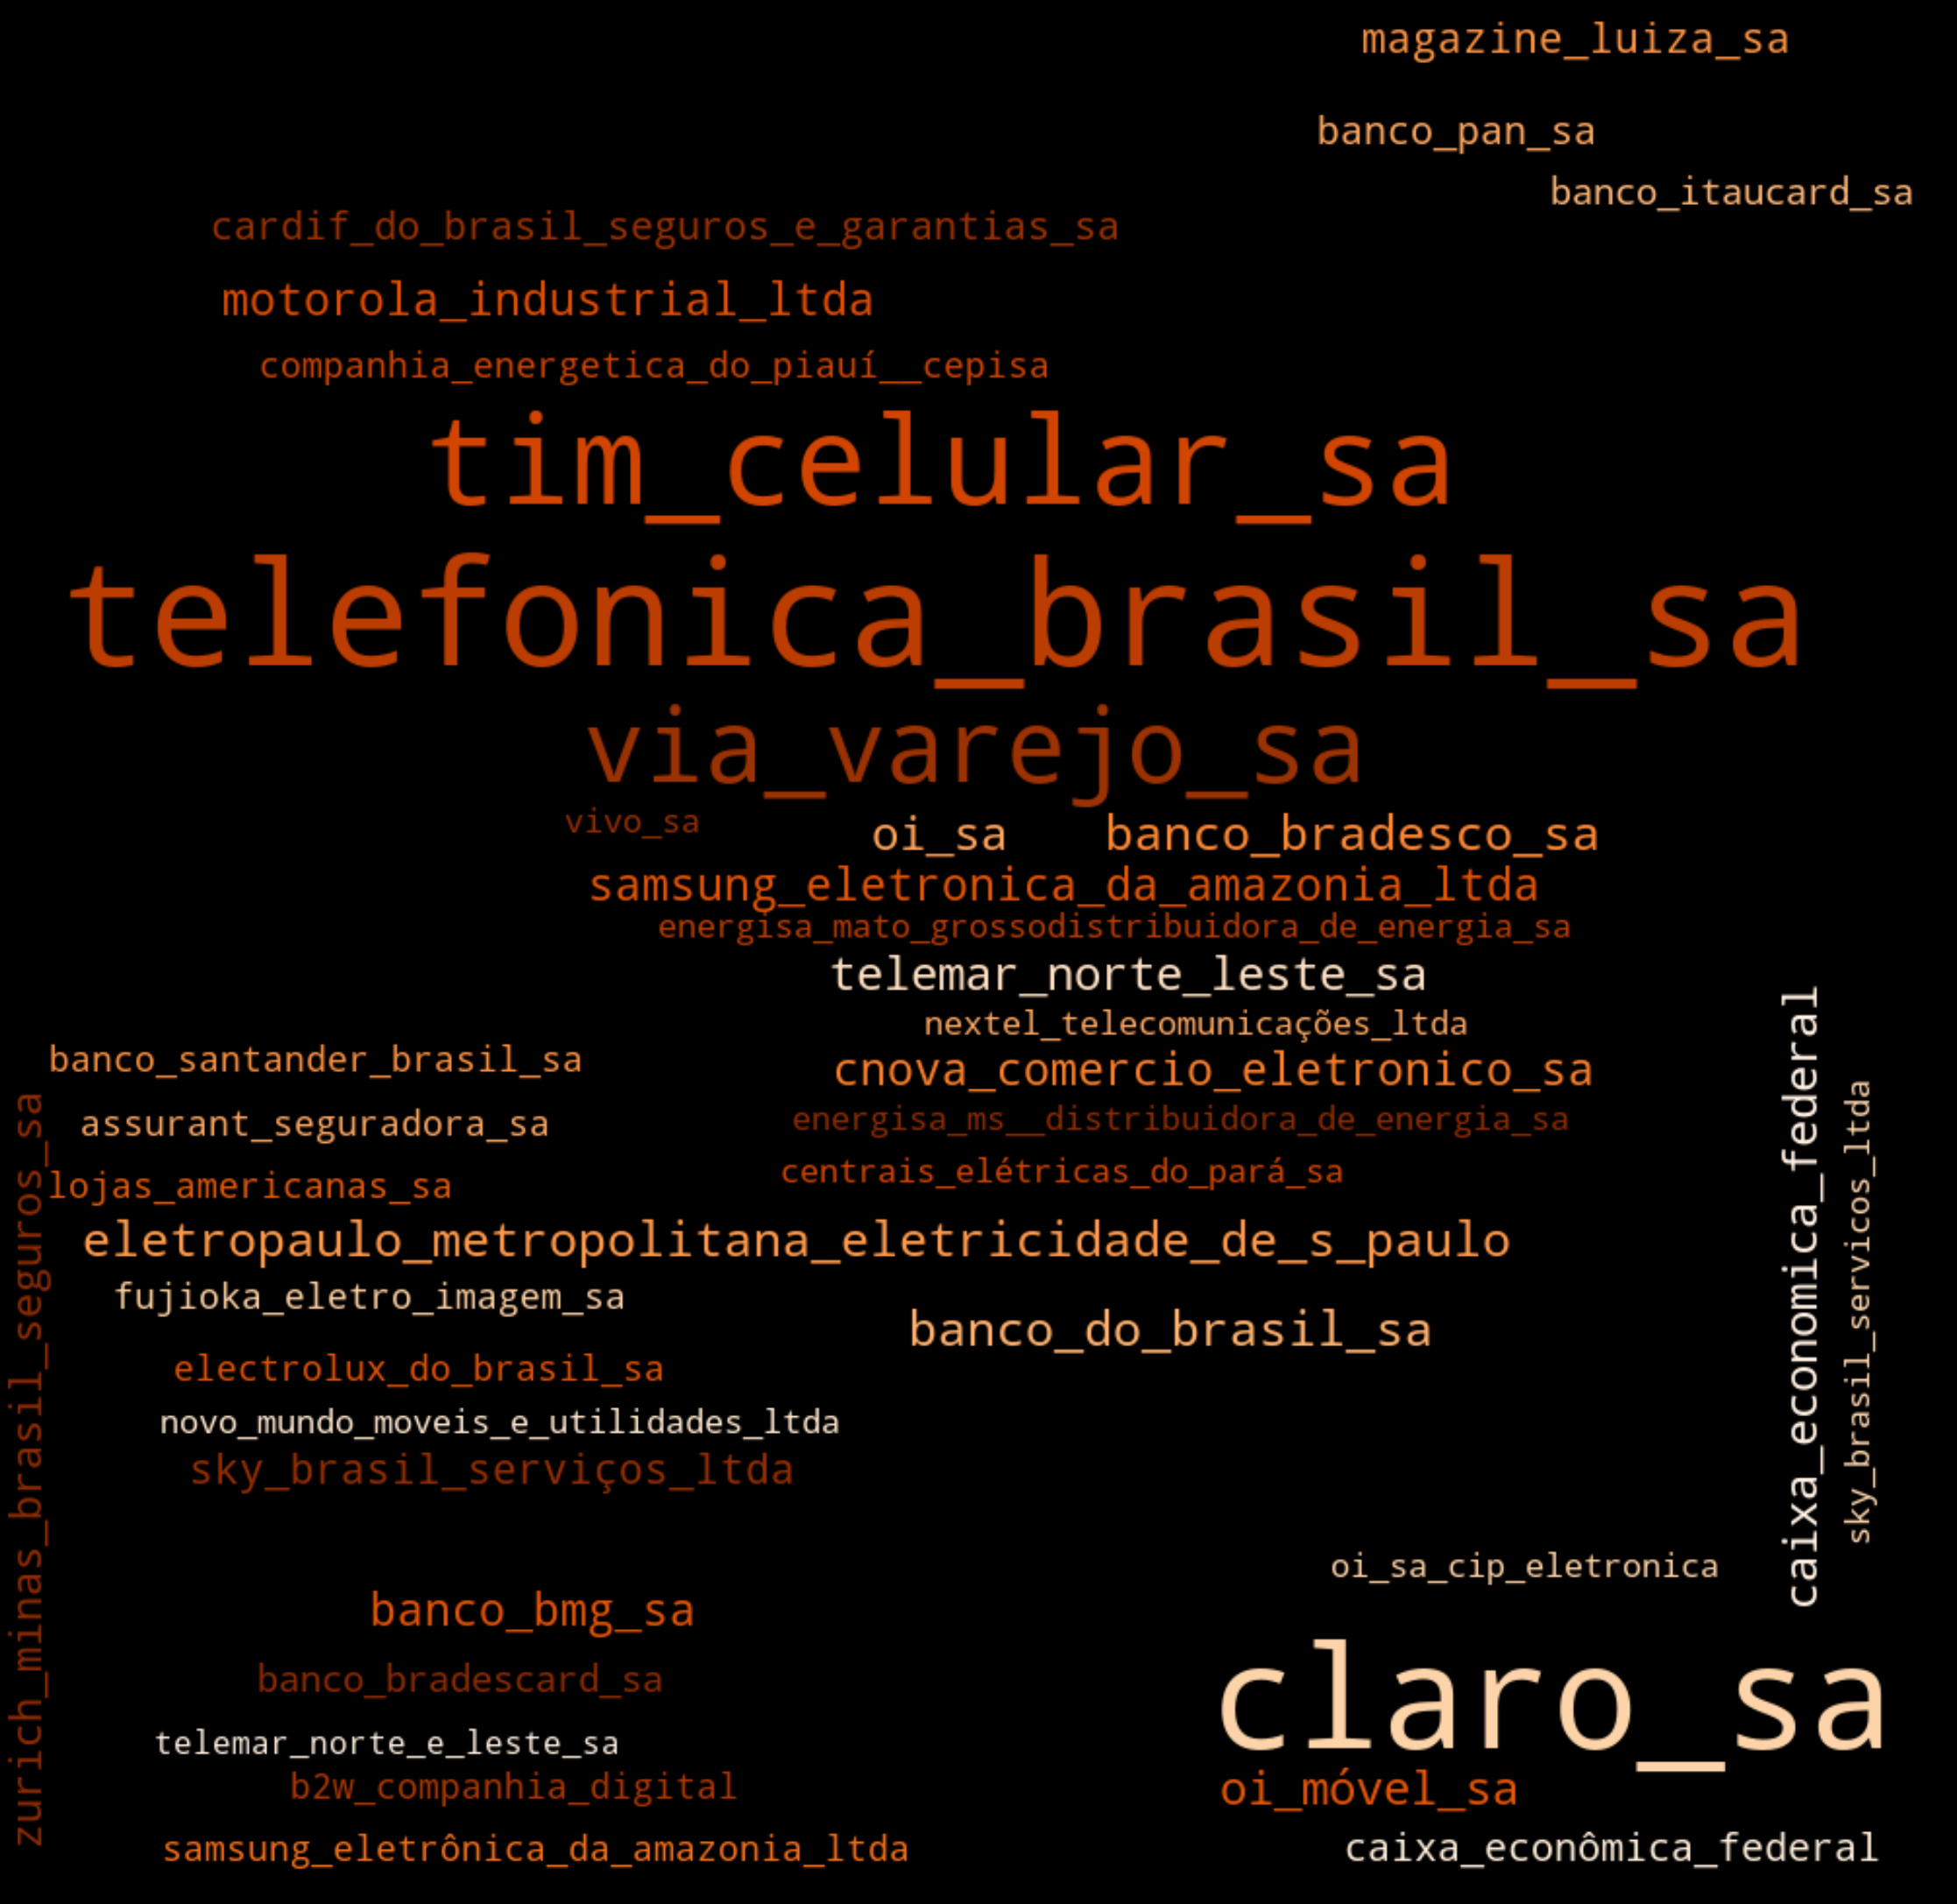

In [15]:

brasil_msk = np.array(Image.open("brasilmapa2.jpg"))

wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              mask=brasil_msk,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud_com_mapa.png")
plt.show()

### Para ficar mais claro, é interessante um diagrama de barras ordenado pela quantidade decrescente de problemas, limitado aos 45 mais reclamados. 

In [16]:
df_empresa.columns


Index(['empresa', 'Nome Empresa Sem Espaço'], dtype='object')

In [17]:
df_empresa["NESE"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

In [18]:

df_empresa.NESE.value_counts(ascending=False)

telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
banco_do_brasil___c_a_r_t_õ_e_s                          1
terra_assessoria_imobiliaria_ltda_me                     1
assistencia_tecnica_novo_lar_ltda__me                    1
jj_motores_eireli_me                                     1
speedo_comercio_e_distribuicao_de_artigos_esportiv       1
Name: NESE, Length: 10607, dtype: int64

In [19]:
val=list(df_empresa.NESE.value_counts(ascending=False))

In [20]:
val[0:45]

[1150,
 1125,
 786,
 516,
 480,
 467,
 450,
 419,
 407,
 405,
 394,
 355,
 354,
 342,
 342,
 315,
 293,
 285,
 254,
 243,
 236,
 217,
 206,
 194,
 187,
 182,
 179,
 175,
 170,
 168,
 166,
 156,
 153,
 151,
 149,
 146,
 139,
 139,
 133,
 124,
 123,
 122,
 119,
 119,
 115]

In [21]:
lab=df_empresa.NESE.value_counts(ascending=False)

In [22]:
lab[0:45]

telefonica_brasil_sa                                 1150
claro_sa                                             1125
tim_celular_sa                                        786
via_varejo_sa                                         516
eletropaulo_metropolitana_eletricidade_de_s_paulo     480
banco_do_brasil_sa                                    467
banco_bradesco_sa                                     450
caixa_economica_federal                               419
telemar_norte_leste_sa                                407
oi_sa                                                 405
oi_móvel_sa                                           394
samsung_eletronica_da_amazonia_ltda                   355
cnova_comercio_eletronico_sa                          354
banco_bmg_sa                                          342
motorola_industrial_ltda                              342
zurich_minas_brasil_seguros_sa                        315
sky_brasil_serviços_ltda                              293
magazine_luiza

In [23]:
x = list(range(1,46))


In [24]:
y=val[0:45]

<BarContainer object of 45 artists>

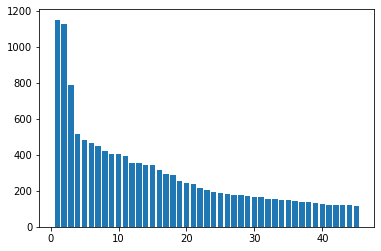

In [25]:
plt.bar(x,y)